In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.options.mode.chained_assignment = None

In [13]:
# URL page we will scraping
url = "https://www.basketball-reference.com/teams/CHI"
html = urlopen(url)
soup = BeautifulSoup(html)

# use findALL() to get the column headers
soup.findAll('tr', limit=2)

# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

df = pd.DataFrame(player_stats, columns = headers)
df["seasons"] = 2021 - np.arange(56)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

df = df.iloc[::-1]
df.reset_index(drop=True, inplace=True)
df[:5]

,seasons,Lg,Team,W,L,W/L%,Finish,SRS,,,...,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,,Playoffs,Coaches,Top WS
0,1966,NBA,Chicago Bulls*,33,48,.407,4th of 5,-3.37,,,...,0.6,92.3,-3.8,95.4,-0.7,,,Lost W. Div. Semis,R. Kerr (33-48),B. Boozer (9.4)
1,1967,NBA,Chicago Bulls*,29,53,.354,4th of 6,-3.76,,,...,-4.1,94.1,-2.7,97.5,0.7,,,Lost W. Div. Semis,R. Kerr (29-53),B. Boozer (10.6)
2,1968,NBA,Chicago Bulls,33,49,.402,5th of 7,-2.11,,,...,-3.5,92.0,-3.5,94.0,-1.5,,,,D. Motta (33-49),B. Boozer (11.6)
3,1969,NBA,Chicago Bulls*,39,43,.476,3rd of 7,-1.71,,,...,-0.6,97.6,-1.4,99.1,0.1,,,Lost W. Div. Semis,D. Motta (39-43),C. Walker (9.8)
4,1970,NBA,Chicago Bulls*,51,31,.622,2nd of 4,5.47,,,...,-5.4,100.5,3.3,95.7,-1.5,,,Lost W. Conf. Semis,D. Motta (51-31),C. Walker (10.9)


In [14]:
# converting data into numeric form as it's text by default

numeric_cols = ['W', 'L', 'W/L%', 'SRS', 'Pace', 'Rel Pace', 'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], downcast="float")

In [15]:
A = np.array([18, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31])
B = np.arange(56)
B = np.array([i for i in B if i not in A])

In [16]:
with_mj_idx = A
without_mj_idx = B
dfa = df.loc[A, :]
dfb = df.loc[B, :]

# MJ's impact on Win Percentage

In [17]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'W/L%'

mean_stat_with_jordan = np.mean(dfa[stat_name])
mean_stat_without_jordan = np.mean(dfb[stat_name])
print(mean_stat_with_jordan, mean_stat_without_jordan)

print(mannwhitneyu(dfa[stat_name], dfb[stat_name]))
print(ttest_ind(dfa[stat_name], dfb[stat_name]))

0.68509096 0.46726662
MannwhitneyuResult(statistic=77.0, pvalue=0.0002258475398134278)
Ttest_indResult(statistic=4.412492474759095, pvalue=4.9243554566130054e-05)


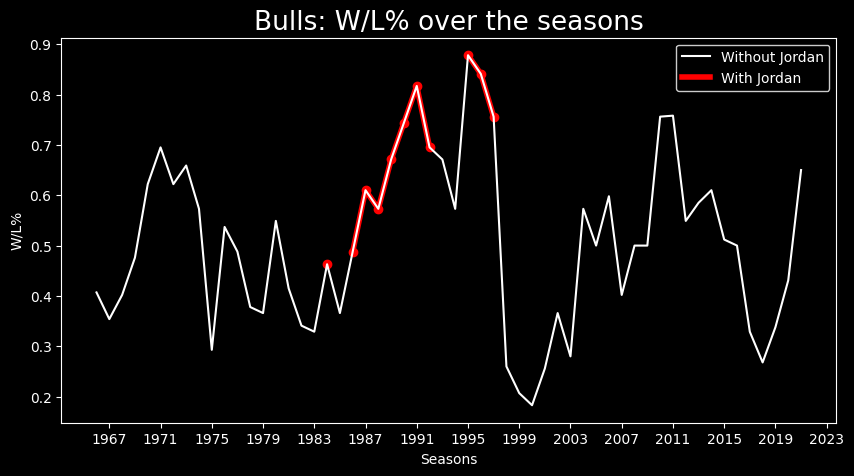

In [10]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10, 5]
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
plt.plot(df['seasons'], df[stat_name], color='white')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Jordan', 'With Jordan'])
plt.xlabel("Seasons")
plt.ylabel("{}".format(stat_name))
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.5)

plt.show()

In [ ]:
# make a frequency plot of Top WS (each players name and how many times it occured), a bar plot of avg. WS of players having Top WS